#### Tasks for 230616


#### 1.
Use height and weight of students from all the schools  as predictors
1. Predict BMI
2. Predict Sex

See the difference with QQ Plots and histograms.

#### 2.
Repeat the above for Puma Indians
1. For the entire data set
2. Data set divided in to 4 age groups:
    < 13
    13 to 27
    28 - 44
    \> 44
Compare the QQ plots



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Six_Schools.xlsx"
df = pd.ExcelFile(filepath)

In [ ]:
df_all = df.parse('all_Schools')
df_all.head()

,School,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI,Student_ID
0,NCB22,1,F,23,Karnataka,Bengaluru,Kannada,157.0,50.0,20.28,NCB22_001
1,NCB22,2,M,24,Karnataka,Bengaluru,Kannada,169.0,55.0,19.26,NCB22_002
2,NCB22,3,M,23,Karnataka,Bengaluru,Kannada,179.0,80.0,24.97,NCB22_003
3,NCB22,4,F,27,Andhra Pradesh,Chittoor,Telugu,173.0,62.0,20.72,NCB22_004
4,NCB22,5,F,23,Karnataka,Bengaluru,Kannada,158.0,46.0,18.43,NCB22_005


# Predicting BMI of all_Schools

<ipython-input-6-94ba8169bfbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr())


<Axes: >

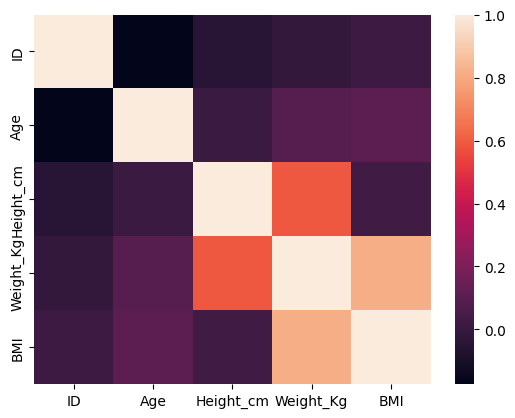

In [ ]:
sns.heatmap(df_all.corr())

In [ ]:
df_all.describe()

,ID,Age,Height_cm,Weight_Kg,BMI
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,123.676871,23.500000,167.812721,64.282653,22.736901
std,123.616056,2.517854,9.421761,12.625226,3.675976
min,1.000000,20.000000,132.000000,16.500000,7.050000
25%,18.000000,22.000000,160.020000,55.000000,20.240000
50%,76.500000,23.000000,168.000000,64.000000,22.640000
75%,208.750000,24.000000,175.000000,73.750000,24.977500
max,407.000000,48.000000,190.000000,100.000000,32.880000


In [ ]:
df_all.isnull().sum()

School           0
ID               0
Sex              0
Age              0
Home_state       0
Home_town        0
Mother_tongue    0
Height_cm        0
Weight_Kg        0
BMI              0
Student_ID       0
dtype: int64

In [ ]:
df_all.keys()

Index(['School', 'ID', 'Sex', 'Age', 'Home_state', 'Home_town',
       'Mother_tongue', 'Height_cm', 'Weight_Kg', 'BMI', 'Student_ID'],
      dtype='object')

In [ ]:
df_all.shape

(294, 11)

In [ ]:
X_train = df_all[['Height_cm', 'Weight_Kg']]
y_train = df_all['BMI']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([22.03209005, 22.30249855, 21.58463015, 31.02299529, 23.94019557])

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.9873623830380689


# Predicting Sex of all_Schools

In [ ]:
def convert_binary(df, column):
  df[column] = df[column].map({'M': 1, 'F': 0})

In [ ]:
convert_binary(df_all, 'Sex')

In [ ]:
df_all.head()

,School,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI,Student_ID
0,NCB22,1,0.0,23,Karnataka,Bengaluru,Kannada,157.0,50.0,20.28,NCB22_001
1,NCB22,2,1.0,24,Karnataka,Bengaluru,Kannada,169.0,55.0,19.26,NCB22_002
2,NCB22,3,1.0,23,Karnataka,Bengaluru,Kannada,179.0,80.0,24.97,NCB22_003
3,NCB22,4,0.0,27,Andhra Pradesh,Chittoor,Telugu,173.0,62.0,20.72,NCB22_004
4,NCB22,5,0.0,23,Karnataka,Bengaluru,Kannada,158.0,46.0,18.43,NCB22_005


In [ ]:
df_all.isnull().sum()

School           0
ID               0
Sex              1
Age              0
Home_state       0
Home_town        0
Mother_tongue    0
Height_cm        0
Weight_Kg        0
BMI              0
Student_ID       0
dtype: int64

In [ ]:
df_all.fillna(0, inplace = True)

In [ ]:
round(df_all['Sex'])

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
289    0.0
290    0.0
291    1.0
292    1.0
293    0.0
Name: Sex, Length: 294, dtype: float64

<Axes: >

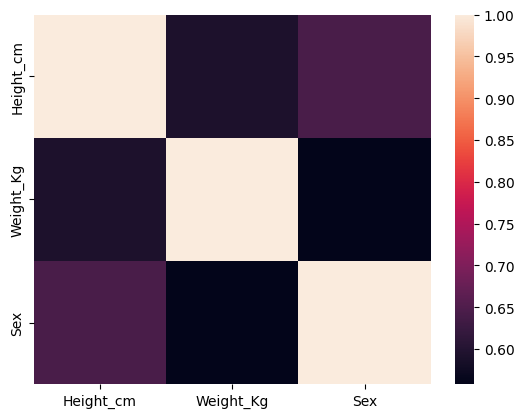

In [ ]:
sns.heatmap(df_all[['Height_cm', 'Weight_Kg', 'Sex']].corr())

In [ ]:
X = df_all[['Height_cm', 'Weight_Kg']]
y = df_all['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred[:6]

array([0.78416434, 0.276984  , 0.69429142, 0.91250133, 0.56297368,
       0.94798189])

In [ ]:
pred = [int(round(value)) for value in pred]

In [ ]:
pred[:6]

[1, 0, 1, 1, 1, 1]

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.44865510177284906


The Sex column had one NaN value which was filled with 0. The predicted values were in the spectrum of 0 and 1 with float values like 0.7, 0.4 and so on. To fix this, I used round off function.

# Predicting Puma Indians BMI

In [ ]:
df.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [ ]:
df_puma = df.parse('Puma_Indian')
df_puma.head()

,Height_cm,Weight_Kg,Age,male,Sex,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
0,53.9750,4.252425,0.0,0,F,NaN,53.975,NaN,50.0
1,55.8800,4.847765,0.0,0,F,NaN,179.070,NaN,60.0
2,56.5150,5.159609,0.0,0,F,NaN,NaN,NaN,70.0
3,59.6138,5.896696,1.0,0,F,NaN,NaN,NaN,80.0
4,60.4520,5.669900,1.0,1,M,NaN,NaN,NaN,90.0


In [ ]:
bmi = lambda row: row['Weight_Kg'] / ((row['Height_cm'] / 100) ** 2)
df_puma['BMI'] = df_puma.apply(bmi, axis = 1)

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']]
y = df_puma['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred[:6]

array([18.9799057 , 18.2205903 , 17.10050677, 22.07383564, 18.52641094,
       14.42551968])

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.9066686914383852


# Predicting Puma Indians sex

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']]
y = df_puma['male']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred = [int(round(value)) for value in pred]

In [ ]:
pred[:6]

[1, 1, 0, 1, 1, 0]

In [ ]:
r2 = model.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.018801483558318566


# Divided by age groups

In [ ]:
age1 = df_puma['Age'] < 13
age2 = (df_puma['Age'] >= 13) & (df_puma['Age'] <= 27)
age3 = (df_puma['Age'] >= 28) & (df_puma['Age'] <= 44)
age4 = df_puma['Age'] > 44

In [ ]:
df_group1 = df_puma[age1]
df_group2 = df_puma[age2]
df_group3 = df_puma[age3]
df_group4 = df_puma[age4]

# QQ plots and histogram for the age groups

In [ ]:
def plot_qq(data, title):
    plt.figure()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

In [ ]:
def plot_histogram(data, title):
    plt.figure()
    plt.hist(data, bins=10, edgecolor='black')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

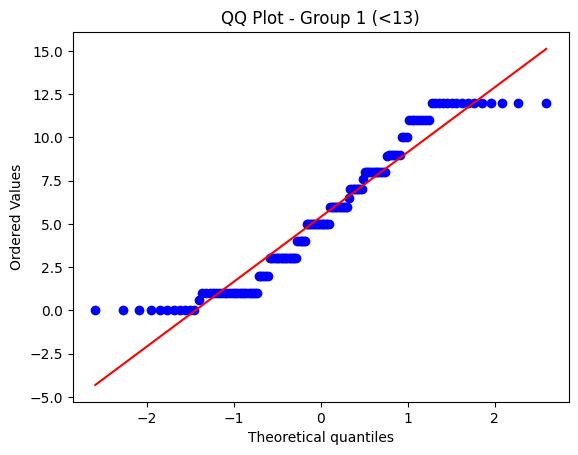

In [ ]:
plot_qq(df_group1['Age'], "QQ Plot - Group 1 (<13)")

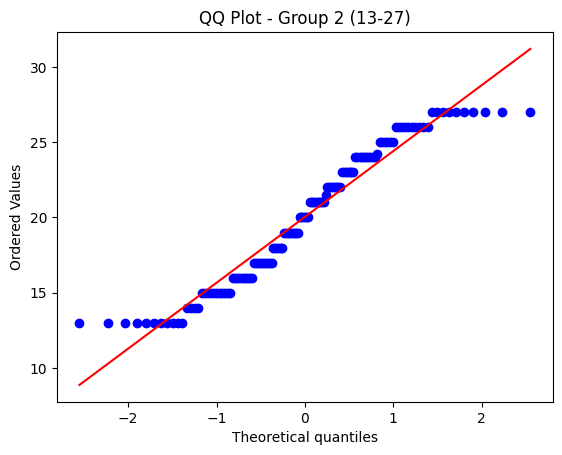

In [ ]:
plot_qq(df_group2['Age'], "QQ Plot - Group 2 (13-27)")

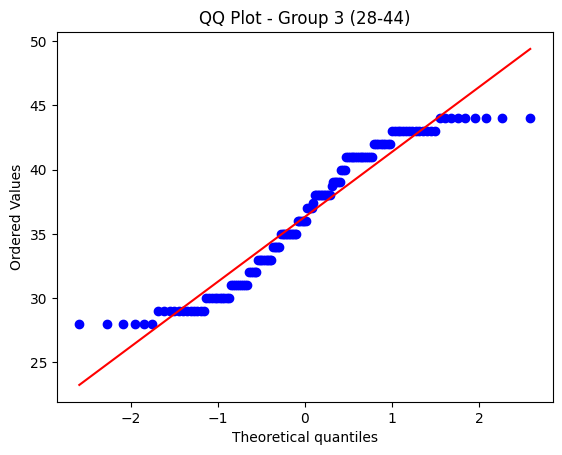

In [ ]:
plot_qq(df_group3['Age'], "QQ Plot - Group 3 (28-44)")

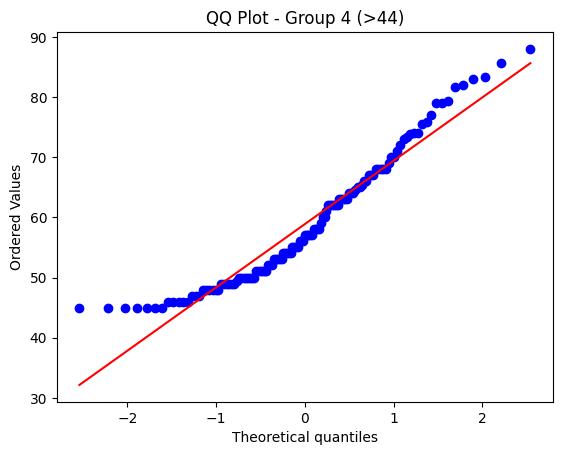

In [ ]:
plot_qq(df_group4['Age'], "QQ Plot - Group 4 (>44)")

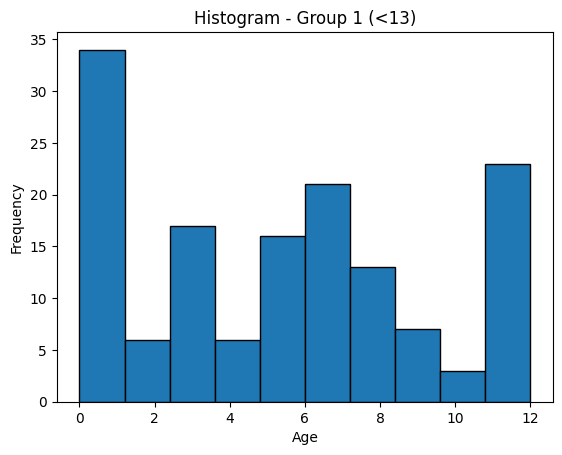

In [ ]:
plot_histogram(df_group1['Age'], "Histogram - Group 1 (<13)")

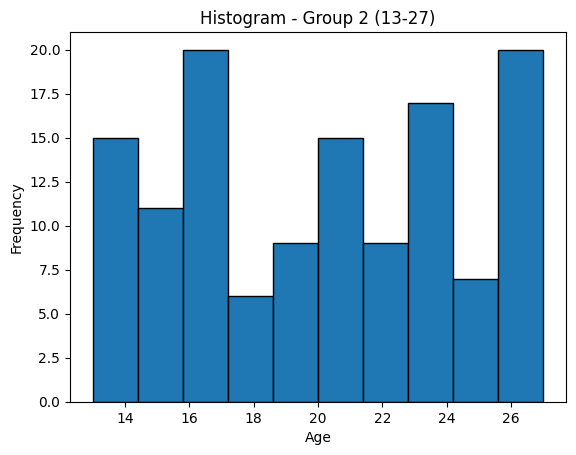

In [ ]:
plot_histogram(df_group2['Age'], "Histogram - Group 2 (13-27)")

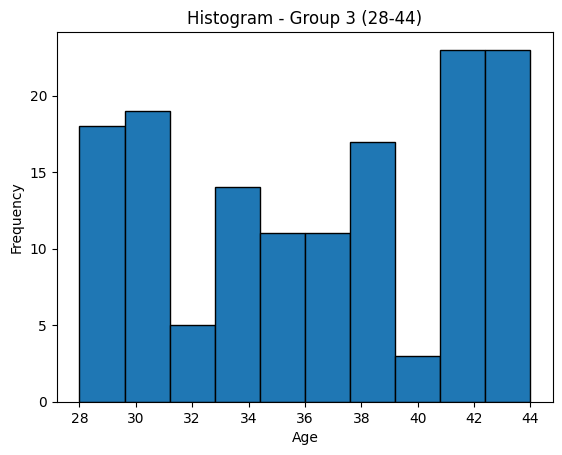

In [ ]:
plot_histogram(df_group3['Age'], "Histogram - Group 3 (28-44)")

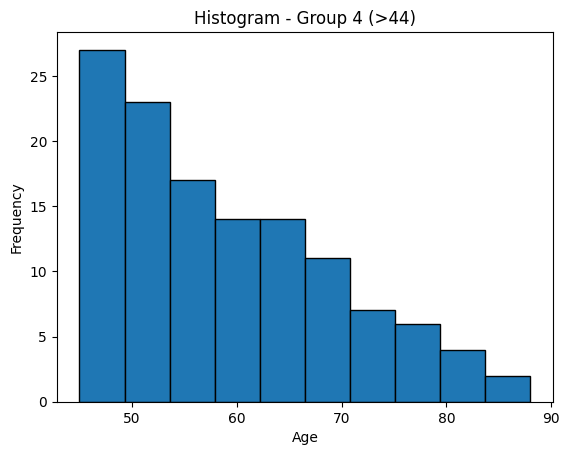

In [ ]:
plot_histogram(df_group4['Age'], "Histogram - Group 4 (>44)")